## ARモデル
1. サンプルデータに対するADF検定と自己相関、偏自己相関の分析
2. 残差に対する自己相関分析、偏自己相関分析
3. ARモデルで予測する

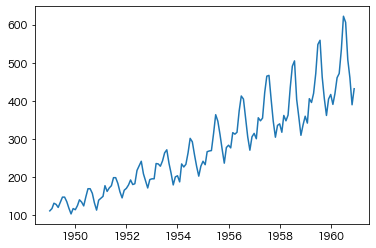

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels
import io
import requests

from statsmodels.tsa.arima_model import ARMA

# 月ごとの飛行機の乗客数データ
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')),index_col='Month',parse_dates=True,dtype='float')
passengers = content['#Passengers'][:120]
passengers_plot= content['#Passengers']
plt.plot(passengers_plot)
plt.show()

## 1. ADF検定・自己相関(ACF)・偏自己相関（PACF)
- ADF検定：定常性の検定
- ACF：
- PACF：

In [11]:
passengers

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1958-08-01    505.0
1958-09-01    404.0
1958-10-01    359.0
1958-11-01    310.0
1958-12-01    337.0
Name: #Passengers, Length: 120, dtype: float64

ADF Statistic: -0.773461
p-value: 0.826794
Critical Values: 	1%: -3.494
Critical Values: 	5%: -2.889
Critical Values: 	10%: -2.582


/Users/daiki/miniforge3/envs/tsukuba/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


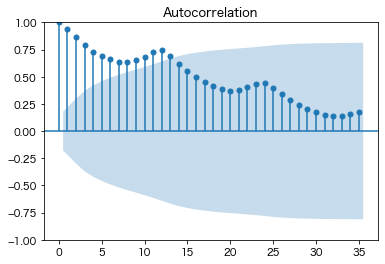

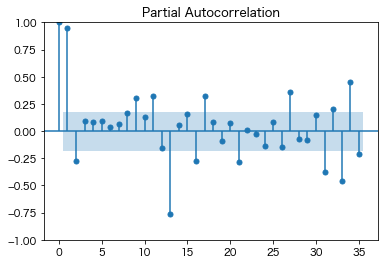

In [13]:
# ADF検定
'''
結論

- このデータは定常性ではない (ADF検定で棄却されなかった)
- 偏自己相関をみると，ラグ1で大きな正の相関、ラグ13で大きな負の相関
    -  

'''

result = sm.tsa.stattools.adfuller(passengers)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('Critical Values:','\t%s: %.3f' % (key, value))
    
# ACF, PACFの可視化
sm.graphics.tsa.plot_acf(passengers, lags=35)
sm.graphics.tsa.plot_pacf(passengers, lags=35) 
plt.show()

# 補足
# 自己相関はseries.autocorr(lag=int)で算出可能

## 2. 残差に対する自己相関・偏自己相関
## 3. ARモデルで予測する

[1, 2, 5]
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  120
Model:              Restr. AutoReg(5)   Log Likelihood                -537.056
Method:               Conditional MLE   S.D. of innovations             25.819
Date:                Fri, 13 May 2022   AIC                           1084.112
Time:                        12:06:31   BIC                           1097.836
Sample:                             5   HQIC                          1089.683
                                  120                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9189      7.194      1.518      0.129      -3.181      25.019
y.L1           1.2656      0.084     15.008      0.000       1.100       1.431
y.L2          -0.4683      0.094     -4.97

'\nなぜ見かけなのか？\n- 基本的に時系列データはデータ点が多い\n- その性質を利用して、軸間隔を狭くすることで予測がうまくできているように「みせる」ことができる\n- それに対する対応として、Out-of-sampleを予測することで「過学習」かどうかわかる\n- もとより、本データは定常性を担保できなかったため、予測できないのは想定できる\n'

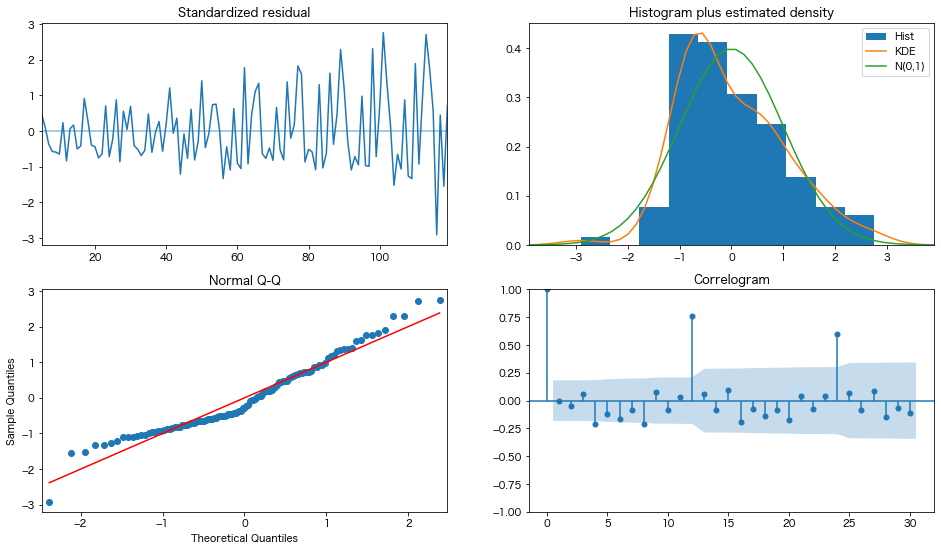

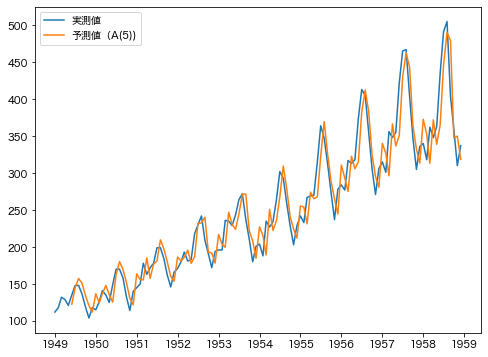

In [76]:
# 最適なラグを見つける（ラグは大きいほうが良い？）

from statsmodels.tsa.ar_model import AutoReg, ar_select_order
sel = ar_select_order(passengers.values, maxlag=6, ic='aic',glob=True)
print(sel.ar_lags) #lag=5ですすめる

# AR(5)
result = sel.model.fit()
print(result.summary())

# 残差の確認
fig = plt.figure(figsize=(16,9))
fig = result.plot_diagnostics(fig=fig, lags=30)

# 見かけの回帰（yyplot)
pred = result.predict()
fig = plt.figure(figsize=(8,6))
plt.plot(passengers, label='実測値')
plt.plot(passengers.index, pred, label='予測値（A(5))')
plt.legend()


'''
なぜ見かけなのか？
- 基本的に時系列データはデータ点が多い
- その性質を利用して、軸間隔を狭くすることで予測がうまくできているように「みせる」ことができる
- それに対する対応として、Out-of-sampleを予測することで「過学習」かどうかわかる
- もとより、本データは定常性を担保できなかったため、予測できないのは想定できる
'''

'''
非定常データに定常性を持つように変換する方法
- 共和分
    - 微分することでトレンド（右肩上がりなど）を除去できる
'''

In [ ]:
#